In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [0]:
# 2. 로지스틱회귀를 이용한 손글씨 인식하기

이전 파일과 다르게 이번에는 텐서플로우에서 제공하는 로지스틱회귀함수를 바로 사용합니다.

먼저 학습학 theta(weight)와 모델을 생성하는 함수를 만들어 봅니다.


In [4]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w):
    return tf.matmul(X, w) # notice we use the same model as linear regression, this is because there is a baked in cost function which performs softmax and cross entropy

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


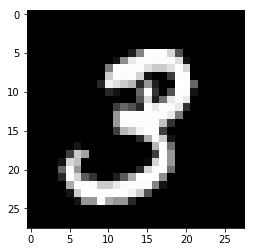

In [5]:
plt.gray()
plt.imshow(trX[1].reshape([28, 28]))
print(trY[1])

In [6]:
X = tf.placeholder("float", [None, 784]) # create symbolic variables
Y = tf.placeholder("float", [None, 10])

w = init_weights([784, 10]) # like in linear regression, we need a shared variable weight matrix for logistic regression

py_x = model(X, w)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y)) # compute mean cross entropy (softmax is applied internally)
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct optimizer
predict_op = tf.argmax(py_x, 1) # at predict time, evaluate the argmax of the logistic regression

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        print(i, np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX})))